In [58]:
import pandas as pd
import matplotlib as plt
import requests
from io import StringIO


In [59]:
# URL of the CSV file
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

In [60]:
# Fetch the data
response = requests.get(url)
if response.status_code == 200:
    csv_data = StringIO(response.text)
    
    # Read the CSV, skipping the first 23 rows
    data = pd.read_csv(csv_data, skiprows=23)
    
    # Inspect column names
    print("Columns in the dataset:", data.columns)
    
    # Parse the date column 
    if 'date' in data.columns:  
        data['date'] = pd.to_datetime(data['date'], errors='coerce')
        print(data.head())
    else:
        print("The 'date' column is not found in the dataset.")
else:
    print(f"Failed to fetch the file. HTTP Status code: {response.status_code}")


C:\Users\owenc\AppData\Local\Temp\ipykernel_1516\2748592833.py:7: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_data, skiprows=23)


Columns in the dataset: Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


C:\Users\owenc\AppData\Local\Temp\ipykernel_1516\2748592833.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


                 date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0 1996-04-10 14:00:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1 1996-07-31 08:00:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2 1996-07-31 09:00:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3 1996-07-31 10:00:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4 1996-07-31 11:00:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


In [61]:
# Parse the date column for easier analysis (if applicable)
data['date'] = pd.to_datetime(data['date'])  

In [62]:
print(data.columns)

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


In [63]:
# Ensure columns have consistent naming and data types
data.columns = data.columns.str.strip().str.lower()  

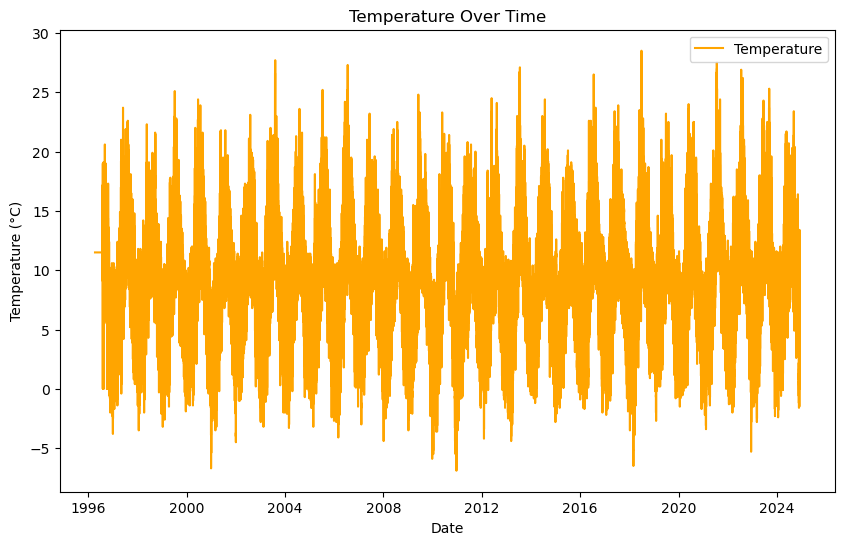

In [64]:
# Task 1: Plot the temperature
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['temp'], label='Temperature', color='orange')  
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

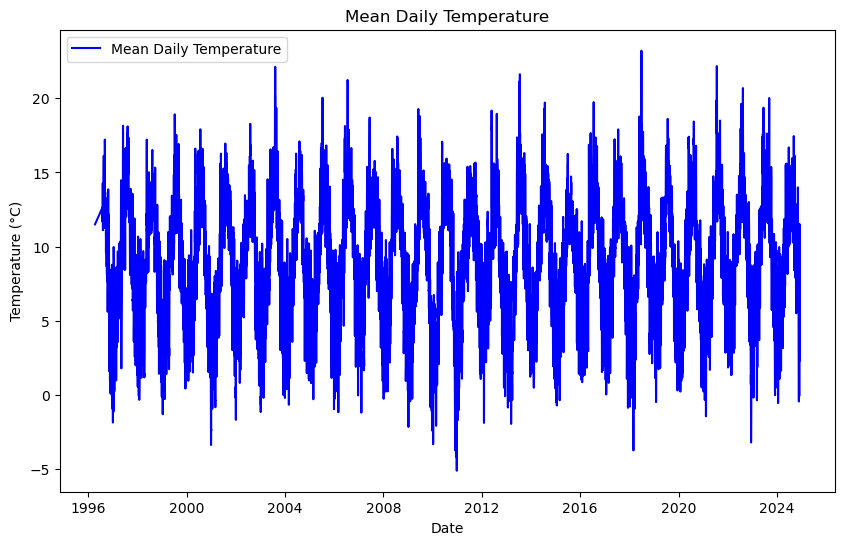

In [65]:
# Task 2: Mean temperature each day
data['date_only'] = data['date'].dt.date
mean_daily_temp = data.groupby('date_only')['temp'].mean()  
plt.figure(figsize=(10, 6))
mean_daily_temp.plot(label='Mean Daily Temperature', color='blue')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

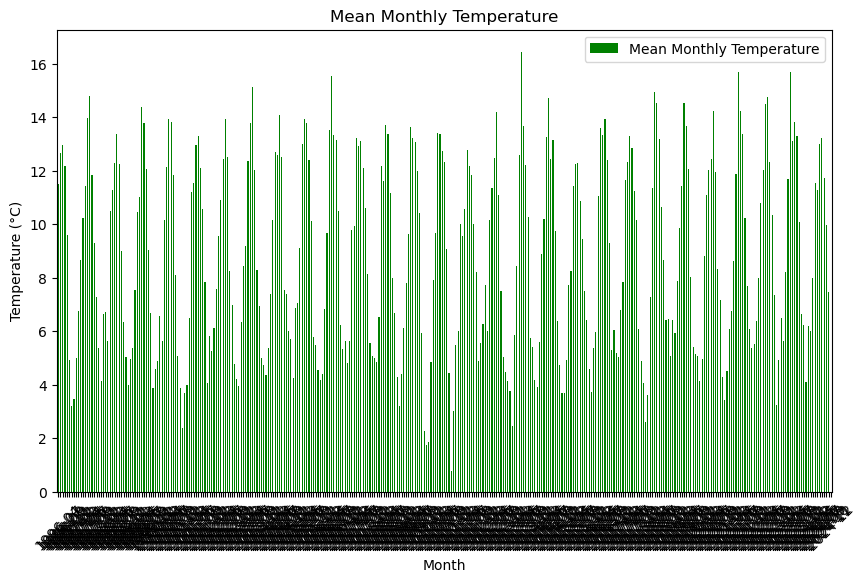

In [66]:
# Task 3: Mean temperature for each month
data['month'] = data['date'].dt.to_period('M')
mean_monthly_temp = data.groupby('month')['temp'].mean()  
plt.figure(figsize=(10, 6))
mean_monthly_temp.plot(kind='bar', label='Mean Monthly Temperature', color='green')
plt.title('Mean Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [67]:
# Task 4: Plot the windspeed (with missing data handled)
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['wind_speed'], label='Wind Speed', color='purple', alpha=0.6)  
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

KeyError: 'wind_speed'

<Figure size 1000x600 with 0 Axes>

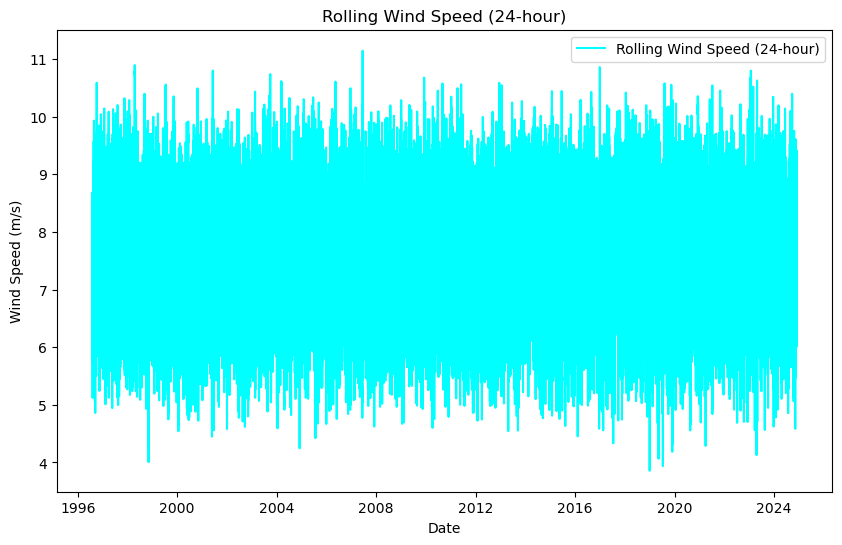

In [ ]:
# Task 5: Rolling windspeed (e.g., over 24 hours)
data['rolling_wind_speed'] = data['wind_speed'].rolling(window=24).mean()  
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['rolling_wind_speed'], label='Rolling Wind Speed (24-hour)', color='cyan')
plt.title('Rolling Wind Speed (24-hour)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

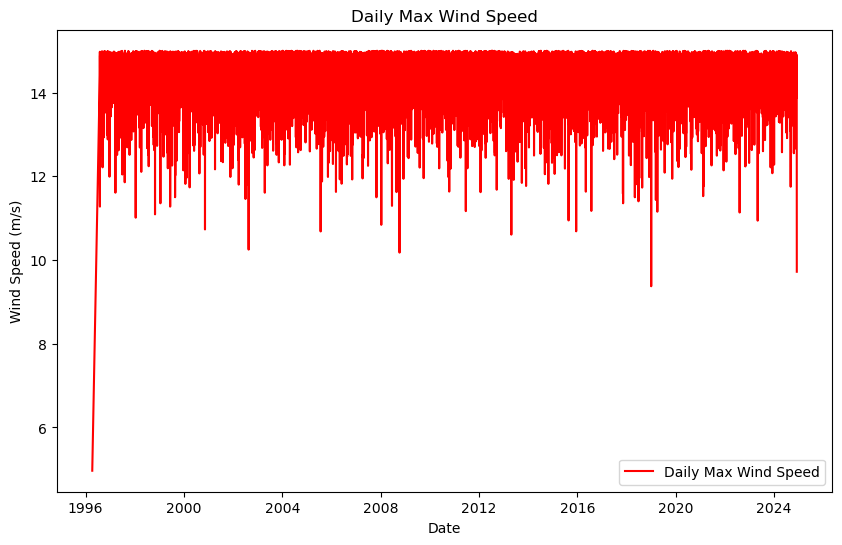

In [ ]:
# Task 6: Max windspeed for each day
daily_max_wind_speed = data.groupby('date_only')['wind_speed'].max()  
plt.figure(figsize=(10, 6))
daily_max_wind_speed.plot(label='Daily Max Wind Speed', color='red')
plt.title('Daily Max Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

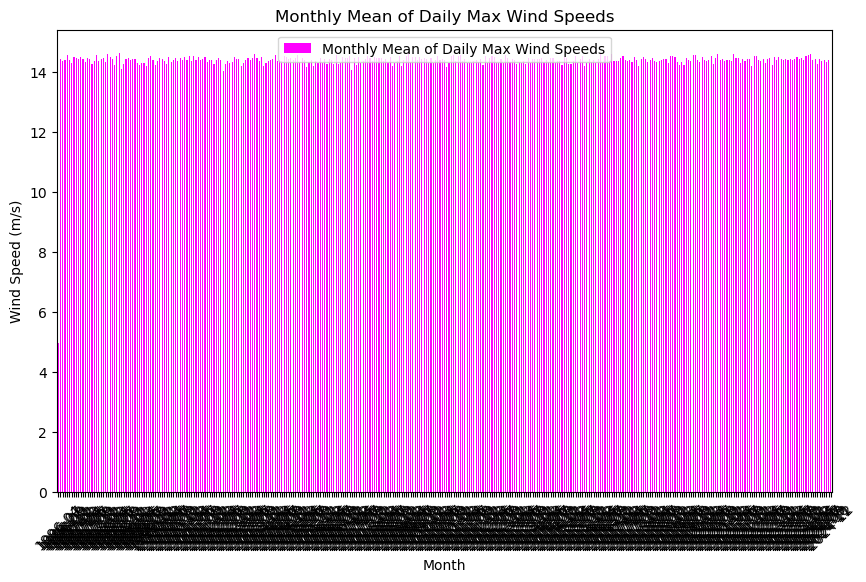

In [ ]:
# Task 7: Monthly mean of daily max windspeeds
monthly_mean_daily_max_wind_speed = daily_max_wind_speed.groupby(daily_max_wind_speed.index.to_period('M')).mean()
plt.figure(figsize=(10, 6))
monthly_mean_daily_max_wind_speed.plot(kind='bar', label='Monthly Mean of Daily Max Wind Speeds', color='magenta')
plt.title('Monthly Mean of Daily Max Wind Speeds')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# End